In [1]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt 
import matplotlib as matplot
import seaborn as sns 
%matplotlib inline

from sklearn.model_selection import train_test_split, KFold
from sklearn.model_selection import cross_val_score

from sklearn.model_selection import cross_val_predict
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score

In [2]:
df = pd.read_csv('HR_comma_sep1.csv')


In [3]:
df.head()


,satisfaction_level,left,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,promotion_last_5years,Department,salary
0,0.38,1,0.53,2,157,3,0,0,sales,low
1,0.80,1,0.86,5,262,6,0,0,sales,medium
2,0.11,1,0.88,7,272,4,0,0,sales,medium
3,0.72,1,0.87,5,223,5,0,0,sales,low
4,0.37,1,0.52,2,159,3,0,0,sales,low


In [4]:
#check for any missing values 
df.isnull().any()


satisfaction_level       False
left                     False
last_evaluation          False
number_project           False
average_montly_hours     False
time_spend_company       False
Work_accident            False
promotion_last_5years    False
Department               False
salary                   False
dtype: bool

In [5]:
#Rename Columns for better readability 
df = df.rename(columns={'satisfaction_level': 'satisfaction', 
                        'last_evaluation': 'evaluation',
                        'number_project': 'projectCount',
                        'average_montly_hours': 'averageMonthlyHours',
                        'promotion_last_5years': 'promotion',
                        'sales' : 'department',
                        'left' : 'Churn'
                        })

In [6]:
df = df.rename(columns={'time_spend_company': 'yearsAtCompany',
                       'Work_accident': 'workAccident'})

In [7]:
df.head()


,satisfaction,Churn,evaluation,projectCount,averageMonthlyHours,yearsAtCompany,workAccident,promotion,Department,salary
0,0.38,1,0.53,2,157,3,0,0,sales,low
1,0.80,1,0.86,5,262,6,0,0,sales,medium
2,0.11,1,0.88,7,272,4,0,0,sales,medium
3,0.72,1,0.87,5,223,5,0,0,sales,low
4,0.37,1,0.52,2,159,3,0,0,sales,low


In [8]:
df.dtypes


satisfaction           float64
Churn                    int64
evaluation             float64
projectCount             int64
averageMonthlyHours      int64
yearsAtCompany           int64
workAccident             int64
promotion                int64
Department              object
salary                  object
dtype: object

In [9]:
#How many employees in the dataset ? 
df.shape

(14999, 10)

In [10]:
#rate of Churn of the company 
Churn_rate = df.Churn.value_counts()/df.shape[0]
Churn_rate


0    0.761917
1    0.238083
Name: Churn, dtype: float64

In [11]:

#Describe the Statistical overview of the employees 
df.describe()

,satisfaction,Churn,evaluation,projectCount,averageMonthlyHours,yearsAtCompany,workAccident,promotion
count,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000
mean,0.612834,0.238083,0.716102,3.803054,201.050337,3.498233,0.144610,0.021268
std,0.248631,0.425924,0.171169,1.232592,49.943099,1.460136,0.351719,0.144281
min,0.090000,0.000000,0.360000,2.000000,96.000000,2.000000,0.000000,0.000000
25%,0.440000,0.000000,0.560000,3.000000,156.000000,3.000000,0.000000,0.000000
50%,0.640000,0.000000,0.720000,4.000000,200.000000,3.000000,0.000000,0.000000
75%,0.820000,0.000000,0.870000,5.000000,245.000000,4.000000,0.000000,0.000000
max,1.000000,1.000000,1.000000,7.000000,310.000000,10.000000,1.000000,1.000000


In [12]:
#Display the mean summary of Employees (Churn vs Non-Churn)
Churn_Summary = df.groupby('Churn')
Churn_Summary.mean()

,satisfaction,evaluation,projectCount,averageMonthlyHours,yearsAtCompany,workAccident,promotion
Churn,,,,,,,
0,0.666810,0.715473,3.786664,199.060203,3.380032,0.175009,0.026251
1,0.440098,0.718113,3.855503,207.419210,3.876505,0.047326,0.005321


In [13]:

#Create a Correlation matrix. To explain what features correlate the most with Churn, what other correlations can be found 
corr = df.corr()
corr

,satisfaction,Churn,evaluation,projectCount,averageMonthlyHours,yearsAtCompany,workAccident,promotion
satisfaction,1.000000,-0.388375,0.105021,-0.142970,-0.020048,-0.100866,0.058697,0.025605
Churn,-0.388375,1.000000,0.006567,0.023787,0.071287,0.144822,-0.154622,-0.061788
evaluation,0.105021,0.006567,1.000000,0.349333,0.339742,0.131591,-0.007104,-0.008684
projectCount,-0.142970,0.023787,0.349333,1.000000,0.417211,0.196786,-0.004741,-0.006064
averageMonthlyHours,-0.020048,0.071287,0.339742,0.417211,1.000000,0.127755,-0.010143,-0.003544
yearsAtCompany,-0.100866,0.144822,0.131591,0.196786,0.127755,1.000000,0.002120,0.067433
workAccident,0.058697,-0.154622,-0.007104,-0.004741,-0.010143,0.002120,1.000000,0.039245
promotion,0.025605,-0.061788,-0.008684,-0.006064,-0.003544,0.067433,0.039245,1.000000


Text(0.5, 1, 'Heatmap of Correlation Matrix')

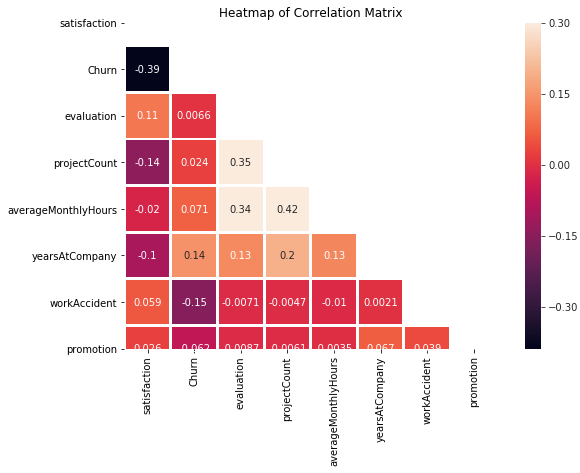

In [14]:
f, ax = plt.subplots(figsize=(10, 6))
corr = (corr)
mask = np.zeros_like(corr)
mask[np.triu_indices_from(mask)] = True
with sns.axes_style("white"):
    sns.heatmap(corr, linewidths=2.0, ax=ax, mask=mask, vmax=.3, square=True, annot=True)
plt.title('Heatmap of Correlation Matrix')


Text(0, 0.5, 'Employee Count')

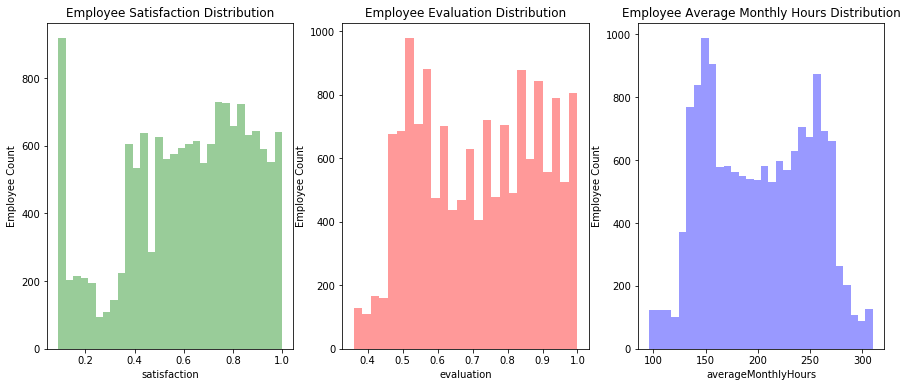

In [15]:
#setup the matplotlib
f, axes = plt.subplots(ncols=3, figsize=(15, 6))

#Graph Employee Satisfaction 
sns.distplot(df.satisfaction, kde=False, color="g", ax=axes[0]).set_title('Employee Satisfaction Distribution')
axes[0].set_ylabel('Employee Count')

#Graph Employee Evaluation 
sns.distplot(df.evaluation, kde=False, color="r", ax=axes[1]).set_title('Employee Evaluation Distribution')
axes[1].set_ylabel('Employee Count')

#Graph Employee Average Monthly Hours
sns.distplot(df.averageMonthlyHours, kde=False, color="b", ax=axes[2]).set_title('Employee Average Monthly Hours Distribution')
axes[2].set_ylabel('Employee Count')

In [16]:

cat_var = ['Department','salary','Churn','promotion']
num_var = ['satisfaction','evaluation','projectCount','averageMonthlyHours','yearsAtCompany', 'workAccident']
categorical_df = pd.get_dummies(df[cat_var], drop_first=True)
numerical_df = df[num_var]

new_df = pd.concat([categorical_df,numerical_df], axis=1)
new_df.head()


,Churn,promotion,Department_RandD,Department_accounting,Department_hr,Department_management,Department_marketing,Department_product_mng,Department_sales,Department_support,Department_technical,salary_low,salary_medium,satisfaction,evaluation,projectCount,averageMonthlyHours,yearsAtCompany,workAccident
0,1,0,0,0,0,0,0,0,1,0,0,1,0,0.38,0.53,2,157,3,0
1,1,0,0,0,0,0,0,0,1,0,0,0,1,0.80,0.86,5,262,6,0
2,1,0,0,0,0,0,0,0,1,0,0,0,1,0.11,0.88,7,272,4,0
3,1,0,0,0,0,0,0,0,1,0,0,1,0,0.72,0.87,5,223,5,0
4,1,0,0,0,0,0,0,0,1,0,0,1,0,0.37,0.52,2,159,3,0


In [17]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report, precision_score, recall_score, confusion_matrix, precision_recall_curve

# Create the X and y set
X = new_df.iloc[:,1:]
y = new_df.iloc[:,0]


In [18]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import cross_val_score

In [19]:

from sklearn.ensemble import RandomForestClassifier

# Random Forest Model
rf = RandomForestClassifier()

scores = cross_val_score(rf, X, y, cv=10, scoring='accuracy')
print(scores)



C:\Users\Aynur\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\Aynur\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\Aynur\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\Aynur\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\Aynur\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: F

[0.99866755 0.996      0.97666667 0.97666667 0.972      0.99066667
 0.99866667 0.99533333 1.         0.99666444]


C:\Users\Aynur\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


In [20]:
print(scores.mean())

0.9901331997925332
